# Practicing on Titanic dataset 
- the aim is to predict correctly the people who survived

#### Importing libraries

In [39]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [40]:
df = pd.read_csv("../datasets/titanic.csv")

## Inspecting dataset
#### Print the shape and the length of the dataset

In [41]:
df.shape, len(df)

((891, 12), 891)

In [42]:
df.index

# if indecies are not ordered well we can reset them
# df.reset_index()

RangeIndex(start=0, stop=891, step=1)

#### Check dataset features

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Renaming some ambigious columns

In [44]:
df=df.rename(columns={"Pclass":"Passenger_class","SibSp":"Sibling_onboard", "Parch":"Parents_children_onboard"})
df.columns

Index(['PassengerId', 'Survived', 'Passenger_class', 'Name', 'Gender', 'Age',
       'Sibling_onboard', 'Parents_children_onboard', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

#### Check data types of the dataset features

In [45]:
df.dtypes

PassengerId                   int64
Survived                      int64
Passenger_class               int64
Name                         object
Gender                       object
Age                         float64
Sibling_onboard               int64
Parents_children_onboard      int64
Ticket                       object
Fare                        float64
Cabin                        object
Embarked                     object
dtype: object

#### Display dataset Infromations
- Count of features
- Count of records (entries)
- Features indecies
- Features names
- Non-Null values count 
- Features data types
- Count of each data type
- Memory occupied by dataset



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   Passenger_class           891 non-null    int64  
 3   Name                      891 non-null    object 
 4   Gender                    891 non-null    object 
 5   Age                       714 non-null    float64
 6   Sibling_onboard           891 non-null    int64  
 7   Parents_children_onboard  891 non-null    int64  
 8   Ticket                    891 non-null    object 
 9   Fare                      891 non-null    float64
 10  Cabin                     204 non-null    object 
 11  Embarked                  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Print the count of non-null records for each column

In [47]:
df.count()

PassengerId                 891
Survived                    891
Passenger_class             891
Name                        891
Gender                      891
Age                         714
Sibling_onboard             891
Parents_children_onboard    891
Ticket                      891
Fare                        891
Cabin                       204
Embarked                    889
dtype: int64

#### Define catigorical and numerical features

In [48]:
cat_columns = []
num_columns = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float' , 'datetime64']:
        num_columns.append(col)
    else:
        cat_columns.append(col)

print("Categorical Features:")
for cat in cat_columns:
    print(cat)

print("\nNumerical Features:")
for num in num_columns:
    print(num)

Categorical Features:
Name
Gender
Ticket
Cabin
Embarked

Numerical Features:
PassengerId
Survived
Passenger_class
Age
Sibling_onboard
Parents_children_onboard
Fare


custom function to print the columns that have null values and the count of them

In [49]:

def columns_have_null_values(df):
    for column in df.columns:
        notnull_values_count= df[column].notnull().sum()
        
        if  notnull_values_count < len(df):
            print(f"{column} | {notnull_values_count}")
            # print("{} | {}".format(column,notnull_values_count))

columns_have_null_values(df)

Age | 714
Cabin | 204
Embarked | 889


#### Display dataset's summary statistics 

In [50]:
df.describe()

,PassengerId,Survived,Passenger_class,Age,Sibling_onboard,Parents_children_onboard,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Display first 5 entries

In [51]:
df.head()

,PassengerId,Survived,Passenger_class,Name,Gender,Age,Sibling_onboard,Parents_children_onboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Display 5 random entries 

In [52]:
random_num = random.randint(0,100)
df.sample(5,random_state=random_num)

,PassengerId,Survived,Passenger_class,Name,Gender,Age,Sibling_onboard,Parents_children_onboard,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S


## Exploratory Data Analysis (EDA)

### Univariate-EDA
explore a single feature at a time to understand the data distribution and identify any outliers

### Data visualization for categorical data

although Passenger_class and Survived are numerical features but they represent categories

In [53]:
# Select categorical types
df_cat= df[cat_columns+['Passenger_class','Survived']]
df_cat

,Name,Gender,Ticket,Cabin,Embarked,Passenger_class,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,1,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,1,1
4,"Allen, Mr. William Henry",male,373450,NaN,S,3,0
...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S,2,0
887,"Graham, Miss. Margaret Edith",female,112053,B42,S,1,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S,3,0
889,"Behr, Mr. Karl Howell",male,111369,C148,C,1,1


In [54]:
df_cat['Passenger_class'].unique()

array([3, 1, 2], dtype=int64)

In [55]:
df_cat['Survived'].unique()

array([0, 1], dtype=int64)

#### **Bar Chart**: 
Categories on one
axis and the corresponding
frequencies or proportions on the other axis. 
Will drop names, cabin and ticket values becuse:
- names cannot be corraleted to anything.
- cabin values has many missing values.
- tickets values are random.

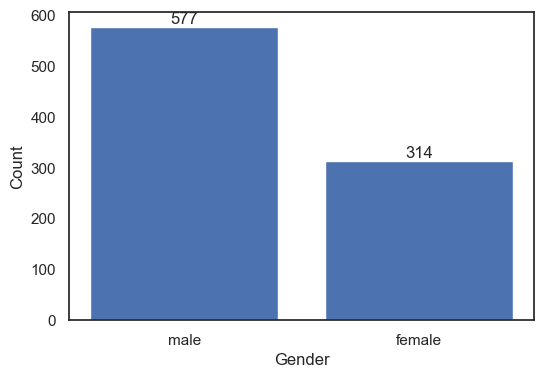

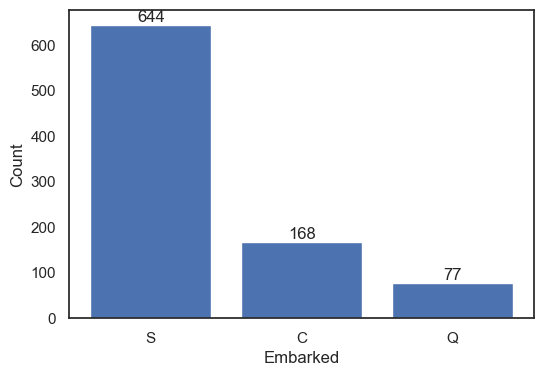

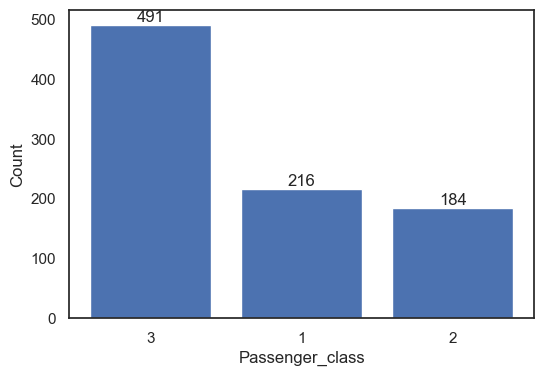

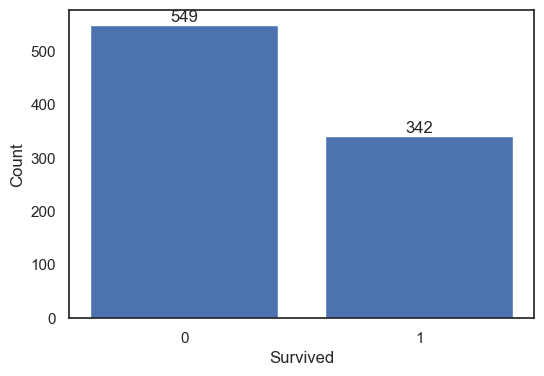

In [56]:
for col in df_cat.drop(["Name","Cabin","Ticket"], axis=1).columns:

    data=df_cat[col].value_counts()

    plt.figure(figsize=(6, 4))
    ax = plt.bar(x=[index.__str__() for index in data.index],height=data.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.bar_label(container=ax,labels=data.values)


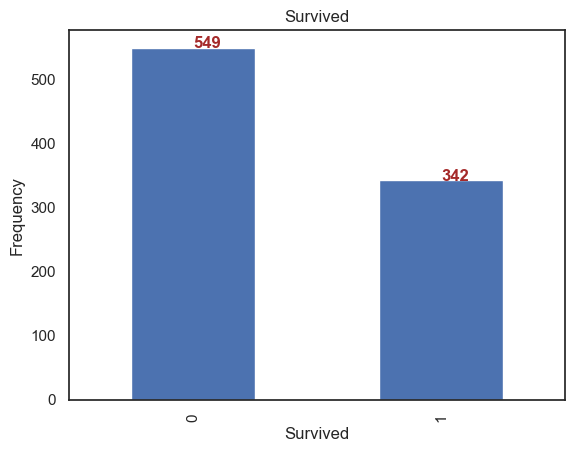

In [57]:
# Survived

fig = df_cat['Survived'].value_counts().plot.bar()
fig.set_title('Survived')

fig.set_ylabel('Frequency')

for indx, value in enumerate(df_cat['Survived'].value_counts()):
    fig.text(indx, value, str(value), 
            color = 'brown', fontweight = 'bold')

#### **Pie Chart**:
Shows relative size
of each category within the
whole

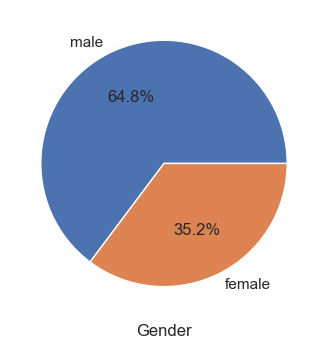

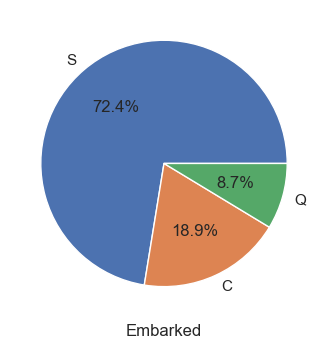

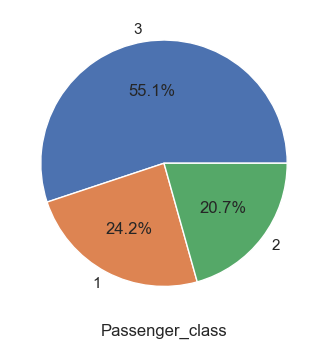

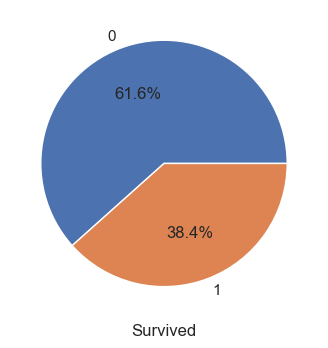

In [58]:
for col in df_cat.drop(["Name","Cabin","Ticket"], axis=1).columns:

    value_counts=df_cat[col].value_counts()

    plt.figure(figsize=(6, 4))
    ax = plt.pie(x=value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.xlabel(col)

### Data visualization for numerical data
first we visualize the continuous numerical columns

In [59]:
num_columns

['PassengerId',
 'Survived',
 'Passenger_class',
 'Age',
 'Sibling_onboard',
 'Parents_children_onboard',
 'Fare']

In [60]:
# define continious numerical columns
con_num_columns=[]
for num_col in num_columns:
    if df[num_col].dtype in ["float64"]:
        con_num_columns.append(num_col)

df_con_num=df[con_num_columns]
df_con_num


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


### Histograms

represents the distribution
of a continuous numerical variable

#### Continuous histogram for continuous columns

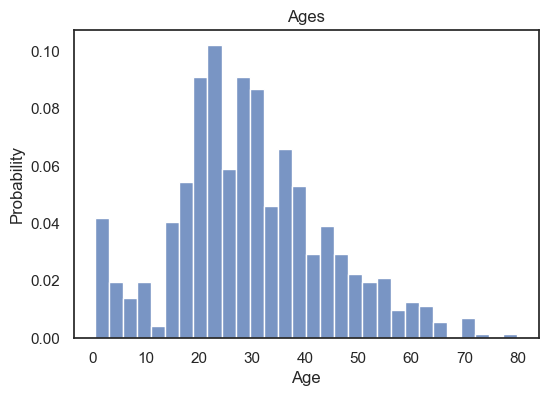

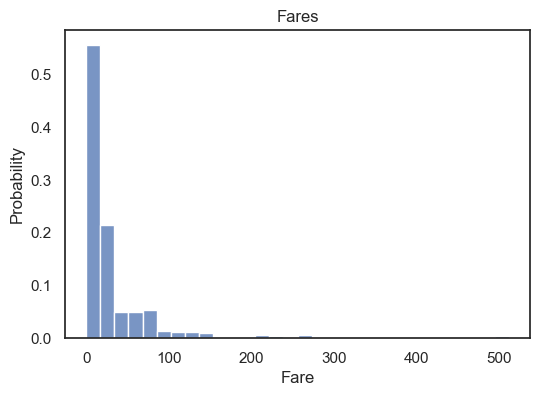

In [61]:
for col in df_con_num.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df_con_num, x=col, bins=30, stat='probability')
    ax.set(title=col+'s', xlabel=col)


Using Pandas histogram to visualize the count of passangers

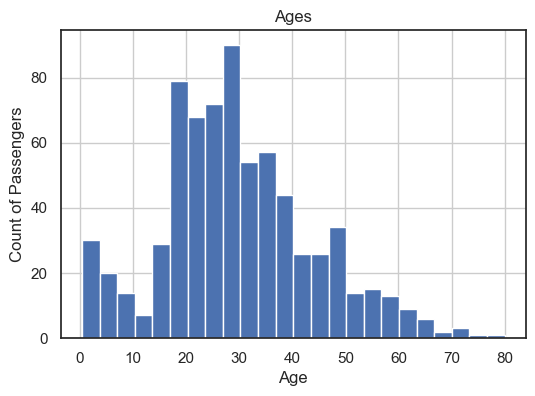

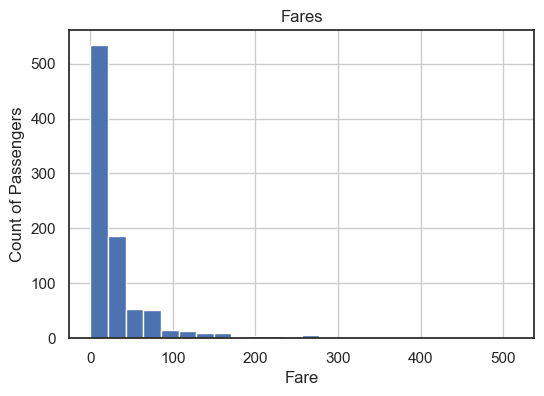

In [62]:
for col in df_con_num.columns:
    plt.figure(figsize=(6,4))
    fig =df_con_num[col].hist(bins=24)
    fig.set_title(col+'s')
    fig.set_xlabel(col)
    fig.set_ylabel('Count of Passengers')

#### Descrete histogram
for descrete values

In [63]:
dis_num_columns=[col for col in df.columns if not col in con_num_columns and col in num_columns]
df_dis_num= df[dis_num_columns].drop(['Survived', 'Passenger_class', 'PassengerId'],axis=1)
df_dis_num

,Sibling_onboard,Parents_children_onboard
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


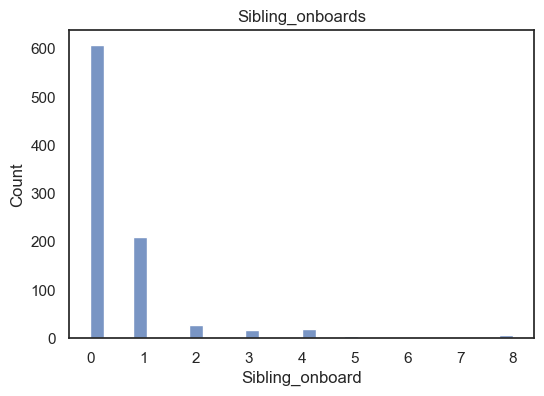

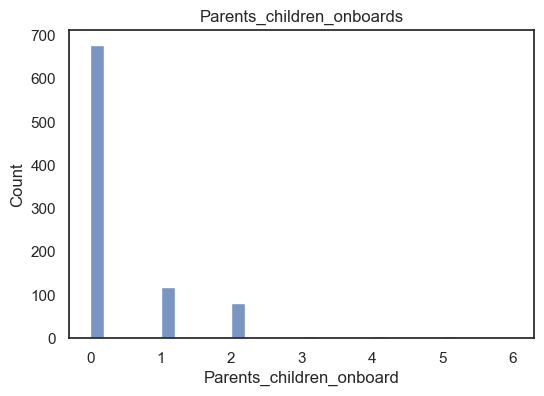

In [64]:
for col in df_dis_num.columns:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df_dis_num, x=col, bins=30, stat='count')
    ax.set(title= col+'s', xlabel=col)

Calculate Skewness for all numerical columns

In [65]:
# Calculate skewness
for col in num_columns:
    print(col)
    skewness = df[col].skew()
    if skewness > 0:
        print("Positive Skewness: {:.2f}".format(skewness))
    elif skewness < 0:  
        print("Negative Skewness: {:.2f}".format(skewness))
    else:
        print("No Skewness")
    print('\n')

PassengerId
No Skewness


Survived
Positive Skewness: 0.48


Passenger_class
Negative Skewness: -0.63


Age
Positive Skewness: 0.39


Sibling_onboard
Positive Skewness: 3.70


Parents_children_onboard
Positive Skewness: 2.75


Fare
Positive Skewness: 4.79




### Boxplot
Depicts the spread and
central tendency of the data,
including median, quartiles, and potential outliers

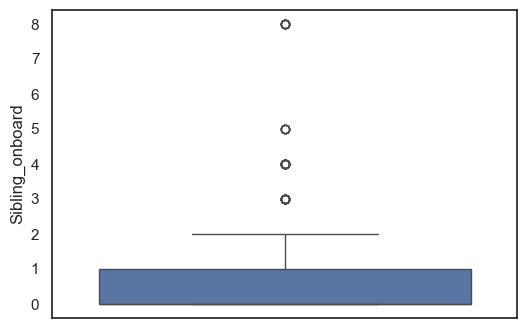

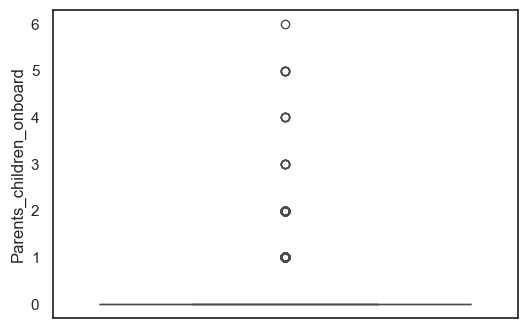

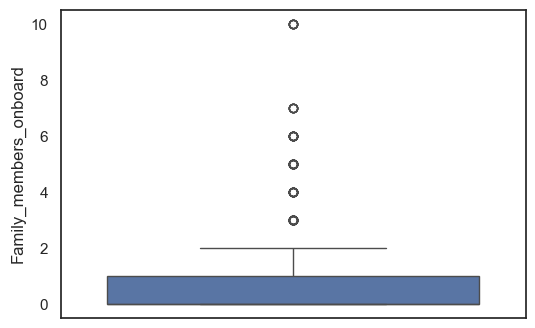

In [66]:

df['Family_members_onboard'] = df_dis_num[df_dis_num.columns[0]]+df_dis_num[df_dis_num.columns[1]]
temp_df=df[[df_dis_num.columns[0],df_dis_num.columns[1],'Family_members_onboard']]

for col in temp_df.columns:
    plt.figure(figsize =(6, 4))
    plt.ylabel(col)

    # plt.boxplot(temp_df[col])
    # or
    sns.boxplot(temp_df[col])

## Bivariate-EDA
looking at two features at a time to understand the relationship and identify any patterns that might exist

### Numerical vs. Numerical

### Scatter Plot
visualize the relationship between two continuous numerical variables by plotting one variable along the x-axis and the other variable along the y-axis

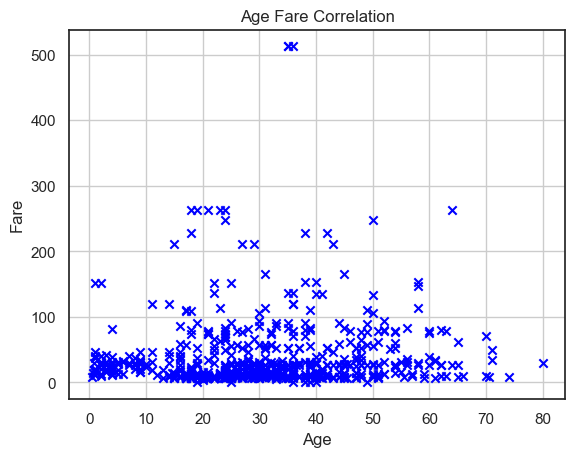

In [67]:
# Create a scatter plot
plt.scatter(df_con_num['Age'], df_con_num['Fare'], color='blue', marker='x')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age Fare Correlation')

# Add grid
plt.grid(True)

### Jointn Plot
combines multiple plots, such as scatter plot and histogram, to visualize the correlation between the variables, including their individual distributions

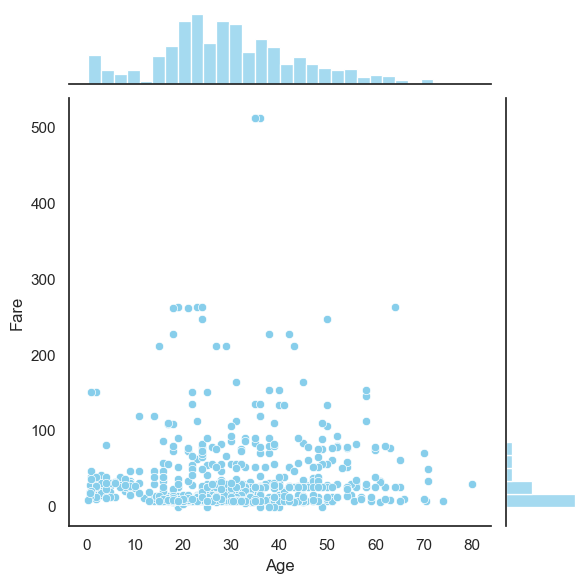

In [68]:
sns.set_theme(style="white", color_codes=True)
sns.jointplot(x=df_con_num['Age'], y=df_con_num['Fare'],
              kind="scatter", color="skyblue", 
              marginal_kws=dict(bins=30, fill=True))

### Numerical by Categories
Explore how a categorical variable
affects a numerical one.

### Grouped Bar Plots
Visualize and compare how a numerical feature varies across different categories of a single categorical feature.

the following plot can be read like this, for example:
- the ratio of men survived in the class 1 having 0 family members onboard less than `0.4`

<Figure size 700x400 with 0 Axes>

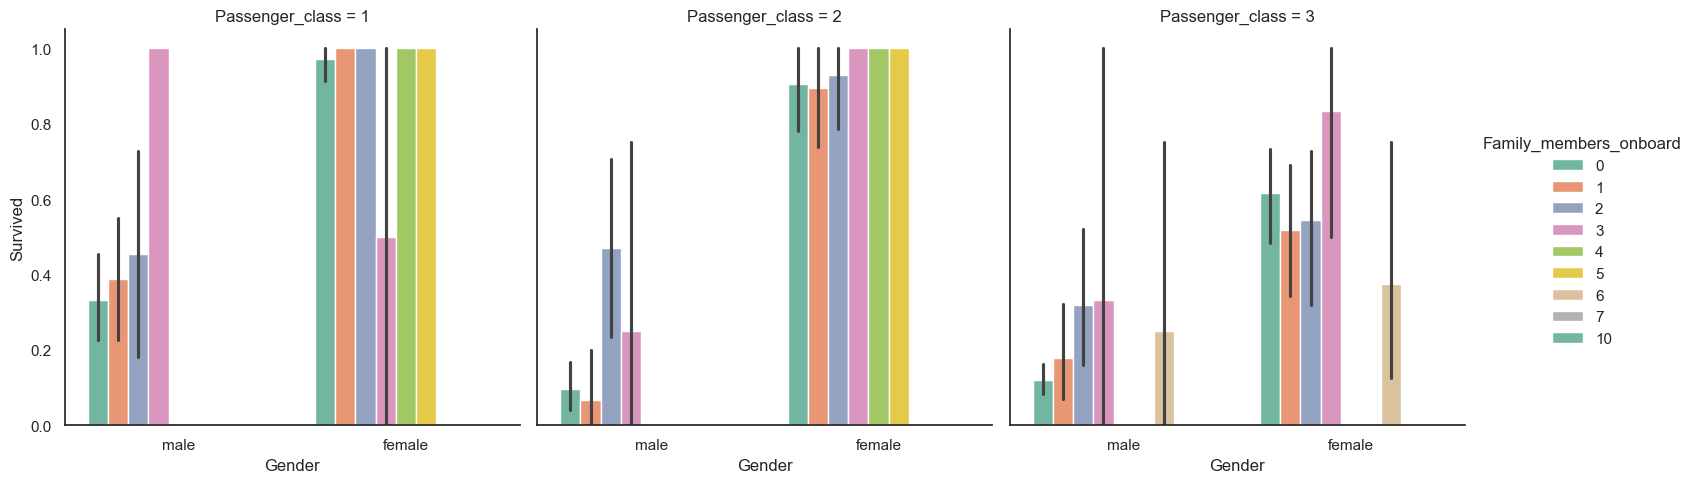

In [69]:
plt.figure(figsize=(7,4))
sns.catplot(x="Gender", y="Survived",hue="Family_members_onboard", col="Passenger_class",
            data=(df), kind="bar", palette="Set2")

### Categorical vs. Categorical
Focuses on the association
between two categorical variables.


### Grouped Box Plots
Comparing the distributions of a continuous variable
across multiple categories

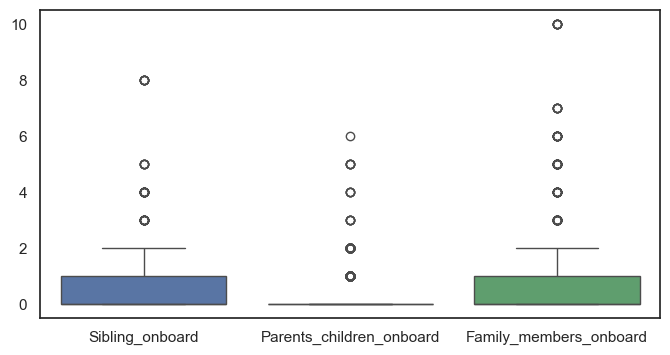

In [70]:
plt.figure(figsize =(8, 4))
sns.boxplot(data=temp_df)
sns.set_theme('notebook')

### Multivariate EDA
Looking at three or more features at a time to understand the relationships and identify any patterns

### Scatter Plot matrix
(used for Numerical vs. Numerical), also known as a Pairs Plot, is used to examine the relationships between multiple variables simultaneously.

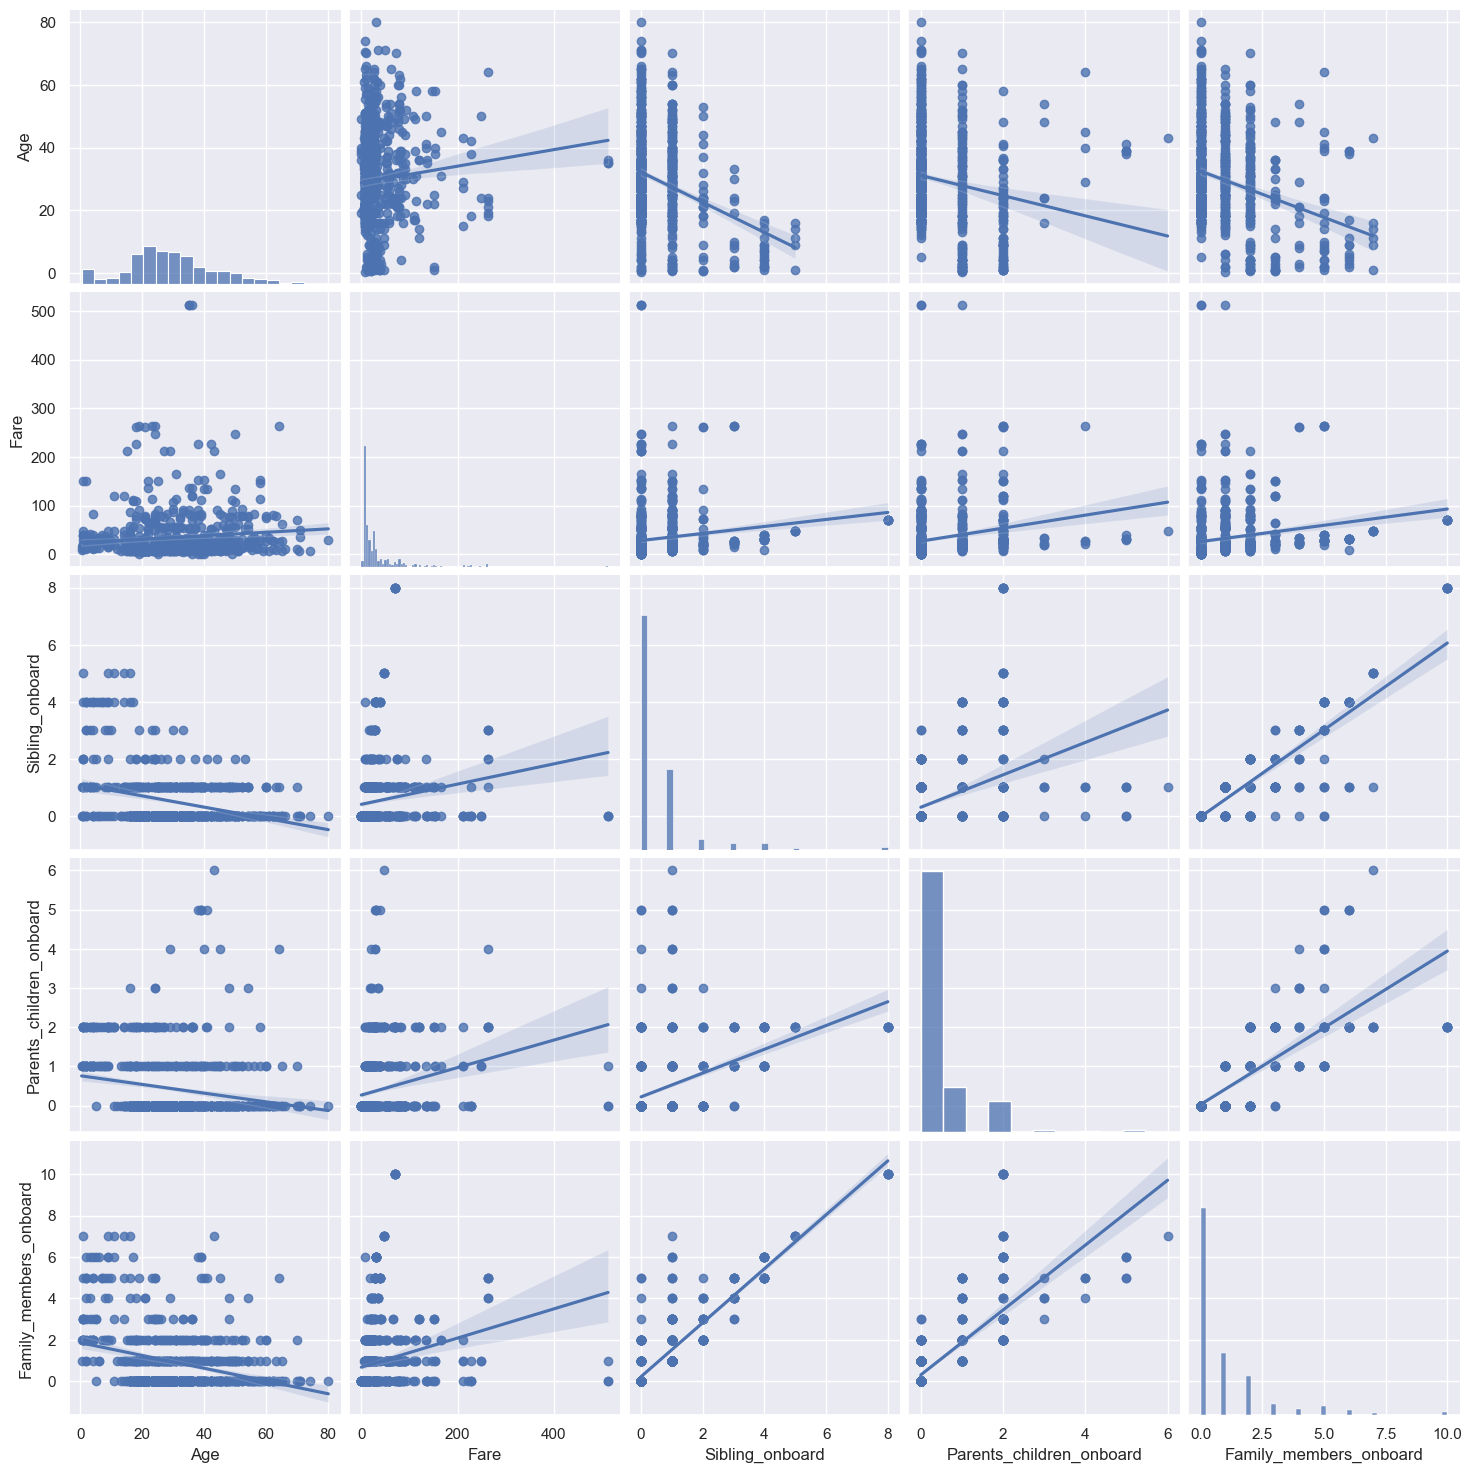

In [76]:
sns.pairplot(df,height=3, vars = con_num_columns+['Sibling_onboard', 'Parents_children_onboard','Family_members_onboard'],  kind="reg")

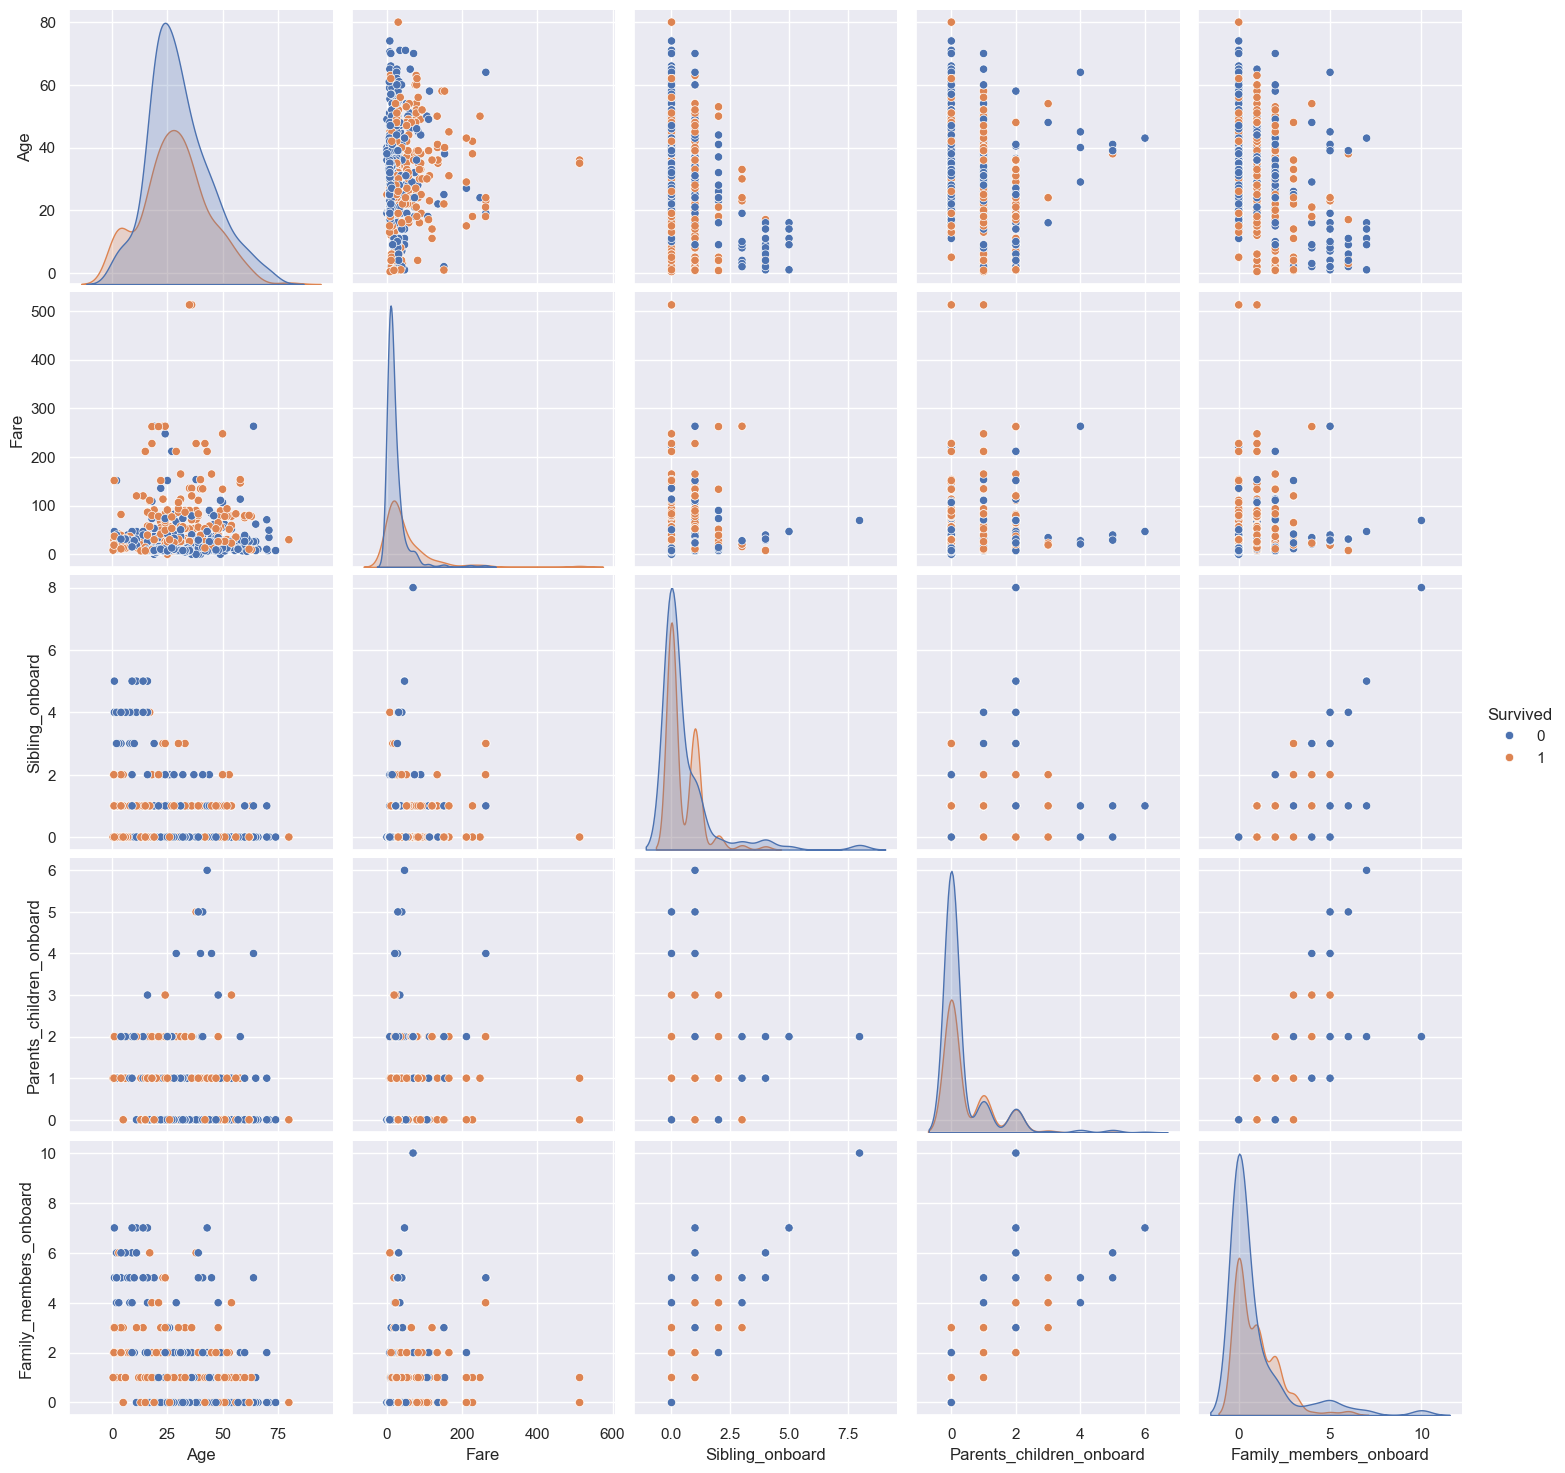

In [79]:
 #pair plot (matrix scatterplot) of few columns 
sns.set_theme(style="darkgrid", color_codes=True)
sns.pairplot(df,height=3, vars = con_num_columns+['Sibling_onboard', 'Parents_children_onboard','Family_members_onboard'], hue='Survived')

### Correlation Matrix & Heatmap
A correlation matrix (used for Numerical vs. Numerical) is a table that shows the correlation coefficients between many variables

In [80]:
df.corr(method='pearson', numeric_only=True)

,PassengerId,Survived,Passenger_class,Age,Sibling_onboard,Parents_children_onboard,Fare,Family_members_onboard
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Passenger_class,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
Sibling_onboard,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parents_children_onboard,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family_members_onboard,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


<Axes: >

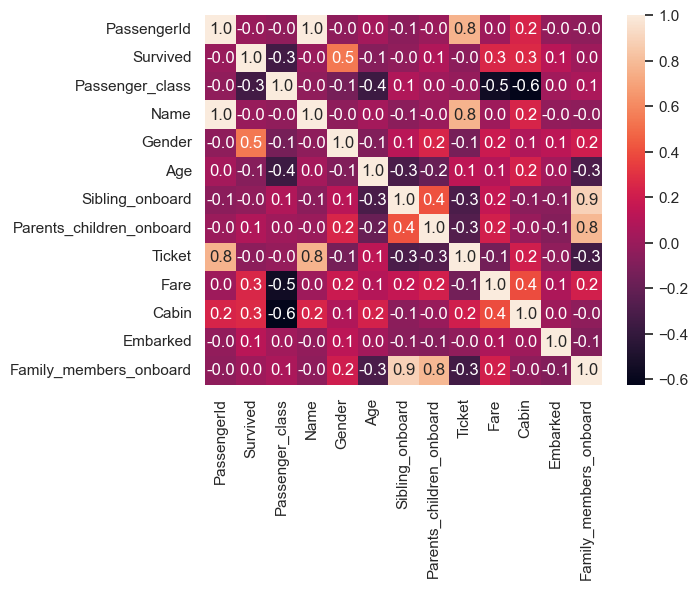

In [93]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

To show the correlations between categorical columns they should be encoded

In [92]:

for col in cat_columns:
    ordinal_mapping = {k: i for i, k in enumerate(df[col].unique(), 0)}
    df[col] = df[col].map(ordinal_mapping)
    df[col]
    
df.head()

,PassengerId,Survived,Passenger_class,Name,Gender,Age,Sibling_onboard,Parents_children_onboard,Ticket,Fare,Cabin,Embarked,Family_members_onboard
0,1,0,3,0,0,22.0,1,0,0,7.2500,0,0,1
1,2,1,1,1,1,38.0,1,0,1,71.2833,1,1,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,0,0,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,2,0,1
4,5,0,3,4,0,35.0,0,0,4,8.0500,0,0,0


<Axes: >

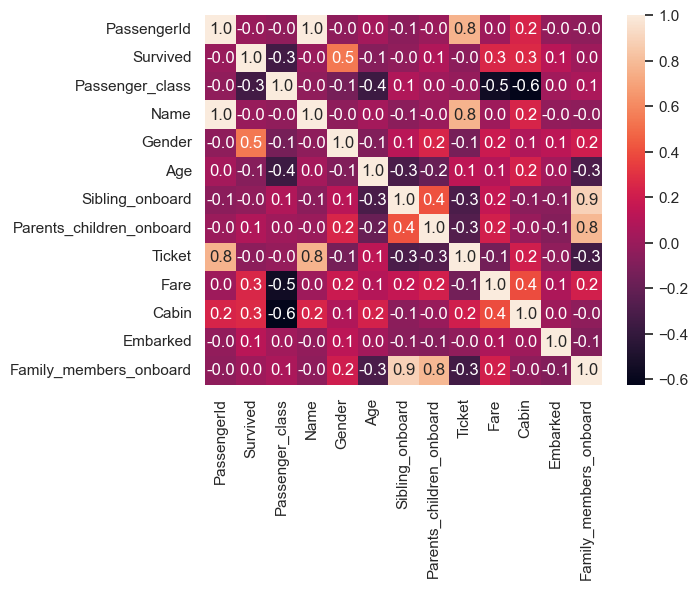

In [94]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")